### 기술 지원 데이터는 종종 고객 경험 개선 기회에 대한 풍부한 정보 소스가 될 수 있습니다. 제품에 대한 고객의 문제가 적을수록 좋습니다. 고객이 최소한의 노력으로 기술적 과제를 신속하게 극복 할 수 있다면 더욱 좋습니다. 기술 지원 데이터를 분석하고 문제 유형, 문제 해결 시간 및 가장 적합한 지원 채널에 대한 기본적인 분석을 수행하겠습니다.

## technical_support_data.csv 파일을 통해, 비슷한 유형의 문제들을 도출하시오.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/technical_support_data.csv')

In [3]:
df

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5


In [4]:
X = df.loc [ :,'no_of_cases':]

In [5]:
from sklearn.cluster import KMeans

In [6]:
wcss = []
for k in range(2,10+1) :
    kmeans = KMeans(n_clusters=k , random_state= 5)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)# = wcss = [] 가 들어있는 함수 inertina   

C:\Users\406\miniconda3\envs\yh\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\406\miniconda3\envs\yh\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\406\miniconda3\envs\yh\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\406\miniconda3\envs\yh\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to 

In [7]:
df_wcss = pd.Series(wcss,index=range(1,10+1))

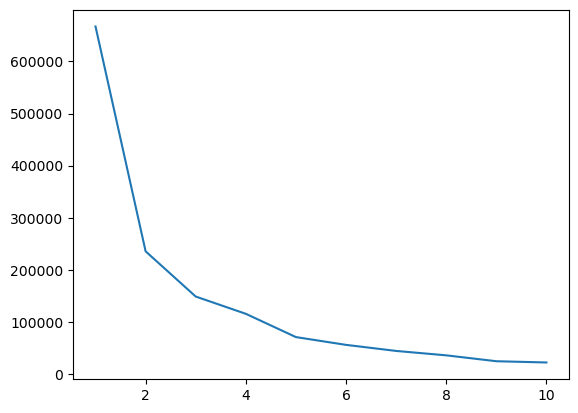

In [8]:
df_wcss.plot()
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 5, random_state = 5)

In [10]:
y_pred = kmeans.fit_predict(X)

C:\Users\406\miniconda3\envs\yh\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
df['Group'] = y_pred

In [12]:
df.loc[df['Group'] == 2 ,]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Group
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25,2
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5,2
11,Cluttered with popup messages,230,1.3,23,0.02,0.00,10,90,2
12,AC controller sofware missing,193,1.2,33,0.03,0.00,100,0,2
17,Freshner holder stuck,140,1.7,23,0.05,0.04,60,40,2


In [13]:
df = pd.read_csv('../data/food_delivery_customer_dataset_original.csv')
df

,customer_id,order_count,total_quantity,total_spent,avg_order_time,favorite_category,region,avg_reorder_cycle_days
0,CUST_1,5,1,14753,1,피자,성동구,23
1,CUST_2,8,1,10600,1,야식,송파구,17
2,CUST_3,3,2,21042,22,피자,마포구,13
3,CUST_4,8,1,9553,23,피자,성동구,28
4,CUST_5,1,1,13534,0,야식,마포구,8
...,...,...,...,...,...,...,...,...
1595,CUST_1596,4,4,222628,18,일식,송파구,20
1596,CUST_1597,4,2,89576,18,프리미엄 해산물,송파구,11
1597,CUST_1598,8,2,89414,19,프리미엄 해산물,용산구,21
1598,CUST_1599,10,3,176712,19,프리미엄 스테이크,마포구,23


In [14]:
X = df.loc[:,'order_count' : ]
X

,order_count,total_quantity,total_spent,avg_order_time,favorite_category,region,avg_reorder_cycle_days
0,5,1,14753,1,피자,성동구,23
1,8,1,10600,1,야식,송파구,17
2,3,2,21042,22,피자,마포구,13
3,8,1,9553,23,피자,성동구,28
4,1,1,13534,0,야식,마포구,8
...,...,...,...,...,...,...,...
1595,4,4,222628,18,일식,송파구,20
1596,4,2,89576,18,프리미엄 해산물,송파구,11
1597,8,2,89414,19,프리미엄 해산물,용산구,21
1598,10,3,176712,19,프리미엄 스테이크,마포구,23


In [15]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder , StandardScaler ,MinMaxScaler

In [16]:
df['favorite_category'].unique()

array(['피자', '야식', '치킨', '한식', '중식', '분식', '족발/보쌈', '일식', '프리미엄 스테이크',
       '프리미엄 해산물', '양식'], dtype=object)

In [17]:
df['region'].unique()

array(['성동구', '송파구', '마포구', '용산구', '강남구'], dtype=object)

In [18]:
from sklearn.compose import ColumnTransformer

In [19]:
ct = ColumnTransformer([('onehot',OneHotEncoder(),[4,5]),
                       ('scaler' , MinMaxScaler(),[0,1,2,3,6])])

In [20]:
X = ct.fit_transform(X)
X

array([[0.        , 0.        , 0.        , ..., 0.02910658, 0.04347826,
        0.69565217],
       [0.        , 1.        , 0.        , ..., 0.01120379, 0.04347826,
        0.43478261],
       [0.        , 0.        , 0.        , ..., 0.05621726, 0.95652174,
        0.26086957],
       ...,
       [0.        , 0.        , 0.        , ..., 0.35095592, 0.82608696,
        0.60869565],
       [0.        , 0.        , 0.        , ..., 0.72728096, 0.82608696,
        0.69565217],
       [0.        , 0.        , 0.        , ..., 0.84134497, 0.82608696,
        0.73913043]])

In [21]:
from sklearn.cluster import KMeans

In [22]:
wcss = []
for k in range (1,10+1) :
    kmeans = KMeans(n_clusters= k, random_state= 5)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [23]:
wcss

[3390.872776097337,
 3057.8813060021566,
 2744.713113952789,
 2424.445445522795,
 2104.759296066477,
 2053.5916931662446,
 1988.7233497893535,
 1978.0059649367183,
 1924.974610517599,
 1886.4211175762907]

In [35]:
df_wcss = pd.Series(wcss,index=range(1,10+1))

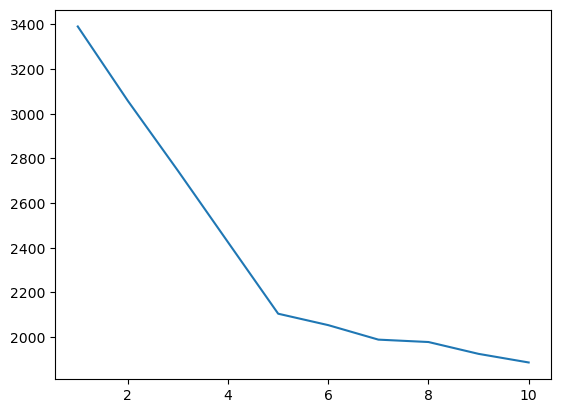

In [36]:
df_wcss.plot()
plt.show()

In [37]:
kmeans = KMeans(n_clusters= 5, random_state= 5)

In [38]:
kmeans.fit_predict(X)

array([1, 4, 2, ..., 3, 2, 3], dtype=int32)

In [39]:
df['Group'] = y_pred
y_pred

array([3, 8, 6, ..., 2, 6, 2], dtype=int32)

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
score_list = []
for k in range(2,10+1) : # 실르엣 스코어 구할때 클러스터 2개 이상으로 넣어줘야한다
    kmeans = KMeans(n_clusters= k, random_state= 5)
    y_pred = kmeans.fit_predict(X)
    score = silhouette_score(X , y_pred)
    score_list.append(score)

### 실루엣 스코어는 -1 ~ 1 사이의 숫자이고 , 1에 가까울수록 군집이 잘 뭉쳐있는것이다

In [42]:
score_list

[0.10489486830735664,
 0.15262803800964117,
 0.20238108998157767,
 0.25324640702872914,
 0.2111031131738809,
 0.18956333079469373,
 0.17954189144933275,
 0.16642557791603352,
 0.14898665633111963]

In [43]:
df

,customer_id,order_count,total_quantity,total_spent,avg_order_time,favorite_category,region,avg_reorder_cycle_days,Group
0,CUST_1,5,1,14753,1,피자,성동구,23,3
1,CUST_2,8,1,10600,1,야식,송파구,17,8
2,CUST_3,3,2,21042,22,피자,마포구,13,6
3,CUST_4,8,1,9553,23,피자,성동구,28,3
4,CUST_5,1,1,13534,0,야식,마포구,8,4
...,...,...,...,...,...,...,...,...,...
1595,CUST_1596,4,4,222628,18,일식,송파구,20,1
1596,CUST_1597,4,2,89576,18,프리미엄 해산물,송파구,11,1
1597,CUST_1598,8,2,89414,19,프리미엄 해산물,용산구,21,2
1598,CUST_1599,10,3,176712,19,프리미엄 스테이크,마포구,23,6


In [45]:
X = df.drop(['customer_id','region'] , axis = 1)
X

,order_count,total_quantity,total_spent,avg_order_time,favorite_category,avg_reorder_cycle_days,Group
0,5,1,14753,1,피자,23,3
1,8,1,10600,1,야식,17,8
2,3,2,21042,22,피자,13,6
3,8,1,9553,23,피자,28,3
4,1,1,13534,0,야식,8,4
...,...,...,...,...,...,...,...
1595,4,4,222628,18,일식,20,1
1596,4,2,89576,18,프리미엄 해산물,11,1
1597,8,2,89414,19,프리미엄 해산물,21,2
1598,10,3,176712,19,프리미엄 스테이크,23,6


In [48]:
ct = ColumnTransformer([('onehot',OneHotEncoder(), [4]),
                       ('scaler',MinMaxScaler(),[0,1,2,3,5])])

In [51]:
X = ct.fit_transform(X)
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [52]:
wcss = []
score_list = []
for k in range (2,10+1) :
    kmeans = KMeans(n_clusters= k , random_state= 5)
    y_pred = kmeans.fit_predict(X)
    score = silhouette_score(X,y_pred)
    score_list.append(score)
    wcss.append(kmeans.inertia_)

C:\Users\406\miniconda3\envs\yh\lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\406\miniconda3\envs\yh\lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\406\miniconda3\envs\yh\lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [53]:
score

1.0

In [54]:
score_list

[0.4563785109797316,
 0.619765524247588,
 0.7293198442486556,
 0.8366667957361035,
 0.9239948192818843,
 1.0,
 1.0,
 1.0,
 1.0]

In [58]:
df_wcss = pd.Series(wcss, index=range(2,10+1))
df_wcss 

2     6.729141e+02
3     4.687172e+02
4     2.759740e+02
5     1.592870e+02
6     7.115636e+01
7     2.059686e-27
8     2.009209e-27
9     2.000298e-27
10    2.008576e-27
dtype: float64

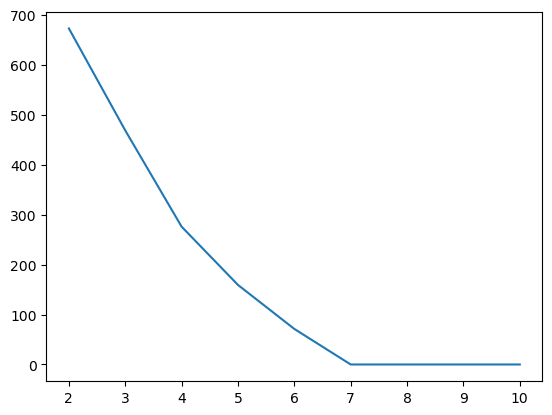

In [59]:
df_wcss.plot()
plt.show()

In [ ]:
df.loc[df['Group'] == 0 , 'region'].unique() 